In [2]:
import sys
import pandas as pd
sys.path.insert(0, "/home/share/huadjyin/home/s_huluni/project/bio_tools/CATree")

with open('/home/share/huadjyin/home/s_huluni/chenqianqian/bgi/CATree/case/sta2/mmu_unique_celltype_ids_list.txt', 'r') as f:
    mmu_unique_celltype_ids_list = [line.strip() for line in f]

import networkx as nx
from catree.dataset.ontoGRAPH import OntoGRAPH
onto = OntoGRAPH(cell_type=mmu_unique_celltype_ids_list)
G = onto.graph
G = nx.relabel_nodes(G, onto.id2name)
for node in G.nodes:
    G.nodes[node].clear()
tree = nx.nx_agraph.to_agraph(G)
tree.layout(prog='dot')
node2pos = {}
for node in tree.nodes():
    node_name = node.get_name()
    x, y = node.attr['pos'].split(',')
    node2pos[node_name] = (float(x)*1000, float(y))
node_df = pd.DataFrame(node2pos).T

{'CL:0000000'}
Lowest Common Ancestor: CL:0000000


100%|██████████| 172/172 [00:04<00:00, 37.07it/s]


get id mapper ...
convert to vocab ...
get hierarchical levels ...
get hierarchical array...
get cell type idx set ...


In [3]:
import colorsys
import numpy as np

node_df['x'] = node_df[0] - node_df[0].min()
node_df['y'] = node_df[1] - node_df[1].min()
max_x = node_df['x'].max()
max_y = node_df['y'].max()
node_df['saturation'] = node_df['x'] / max_x
node_df['hue'] = 0.8 * node_df['y'] / max_y

node_df['rgb'] = [colorsys.hsv_to_rgb(hue, saturation, 0.95 * np.cos(saturation*np.pi/ 4.5)) for saturation, hue in zip(node_df['saturation'], node_df['hue'])]

In [3]:
def _auto_change_line(s, max_length=15):
    ret = ['']
    s_arr = s.split(' ')
    for x in s_arr:
        if ret[-1] == '':
            ret[-1] = x
        else:
            ret[-1] = ret[-1] + ' ' + x
        if len(ret[-1]) >= max_length:
            ret.append('')

    if ret[-1] == '':
        ret = ret[:-1]
    return '\n'.join(ret)

# 生成贝塞尔曲线上的点
def bezier_curve(p0, p1, p2, p3, num_points=100):
    """
    根据起点、两个控制点和终点生成贝塞尔曲线的坐标点
    p0: 起点坐标
    p1: 第一个控制点坐标
    p2: 第二个控制点坐标
    p3: 终点坐标
    num_points: 生成曲线上的点数
    """
    t = np.linspace(0, 1, num_points)[:, np.newaxis]
    p0 = np.array(p0)[np.newaxis, :]
    p1 = np.array(p1)[np.newaxis, :]
    p2 = np.array(p2)[np.newaxis, :]
    p3 = np.array(p3)[np.newaxis, :]
    curve_points = (1 - t) ** 3 * p0 + 3 * (1 - t) ** 2 * t * p1 + 3 * (1 - t) * t ** 2 * p2 + t ** 3 * p3
    return curve_points

[]

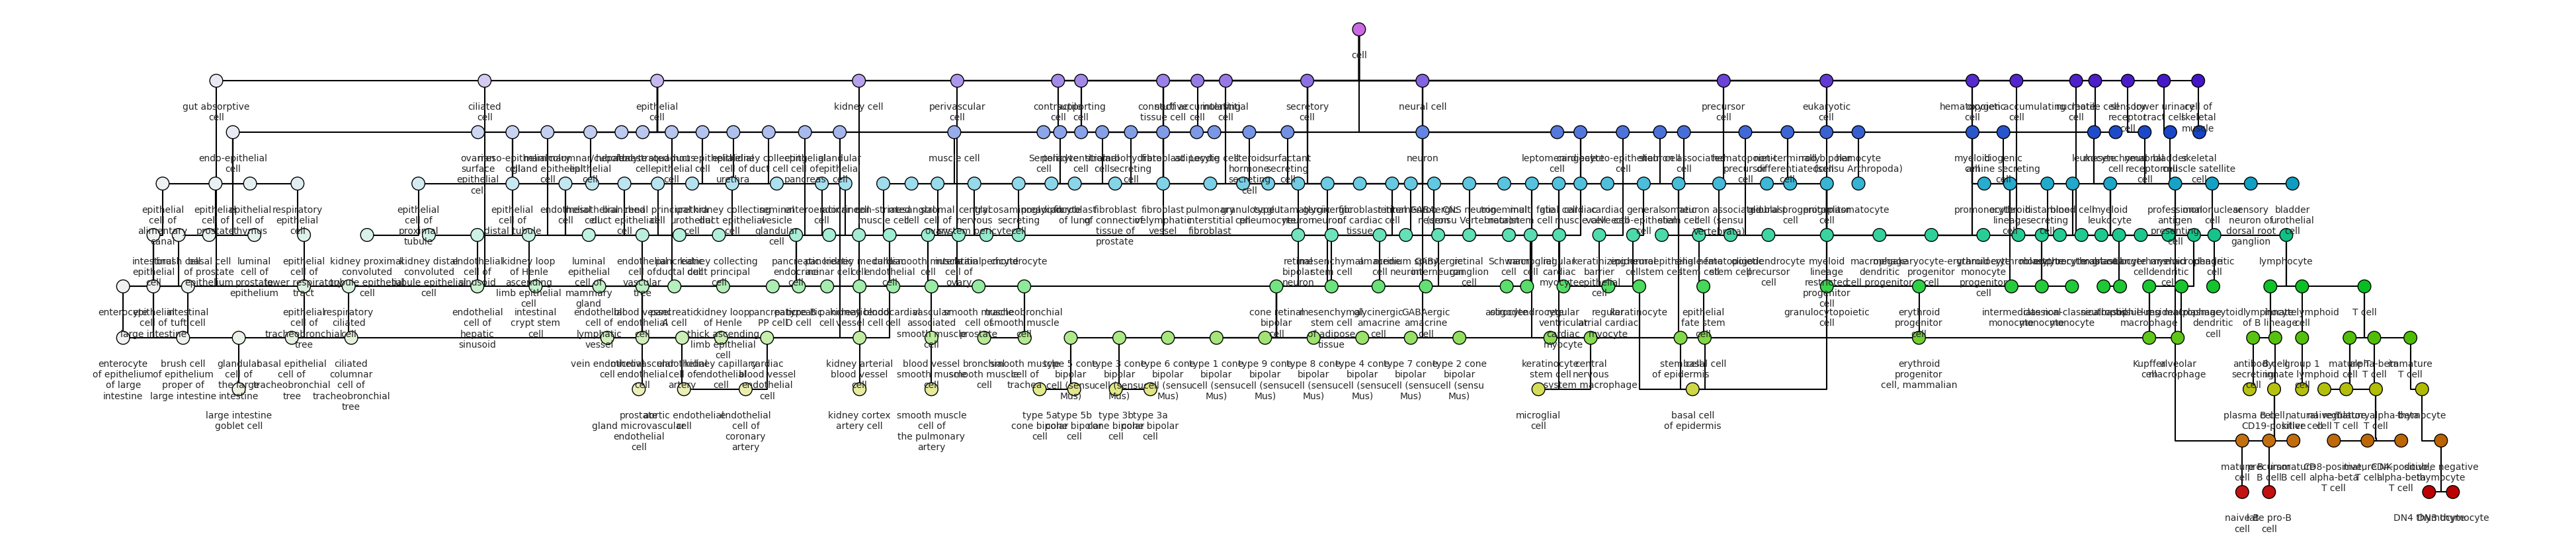

In [6]:
import matplotlib.pyplot as plt

bezier_x_increment = 15

fig, ax = plt.subplots(figsize=(24,10))
ax.scatter(node_df[0], node_df[1], s=200, c = node_df['rgb'],  ec='black')
for i, j in node_df.iterrows():
    ax.text(j[0], j[1]-30, _auto_change_line(i, 7), ha = 'center', va='top',)
    
for a, b, r in G.edges:
    x1, y1 = node2pos[a]
    x2, y2 = node2pos[b]
    #ax.plot([x1, x2], [y1, y2], color = 'black', zorder = -1)
    p0 = [x1, y1]
    p1 = [x1+bezier_x_increment, y1]
    p2 = [x1+bezier_x_increment,y2]
    p3 = [x1+2*bezier_x_increment, y2]
    curve_points = bezier_curve(p0, p1, p2, p3)
    ax.plot(np.append(curve_points[:, 0], x2), np.append(curve_points[:, 1],y2), c='black',zorder=-1)


# 去掉边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

#fig.savefig('./line_tree.pdf')